# Explore here

In [70]:
# Your code here

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
# Guarda archivo carpeta data - raw
df.to_csv('../data/raw/df_medical_insurance_cost.csv', index=False)

In [72]:
df.shape


(1338, 7)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [74]:
df = df.drop_duplicates().reset_index(drop=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


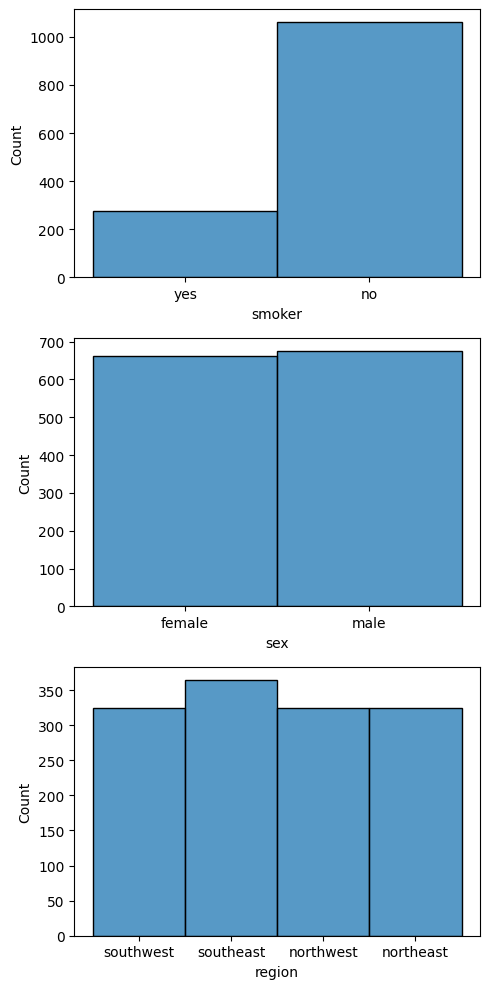

In [75]:
# EDA

import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(3, 1, figsize = (5, 10))

sns.histplot(ax = axis[0], data = df, x = "smoker")
sns.histplot(ax = axis[1], data = df, x = "sex")
sns.histplot(ax = axis[2], data = df, x = "region")

plt.tight_layout()

plt.show()

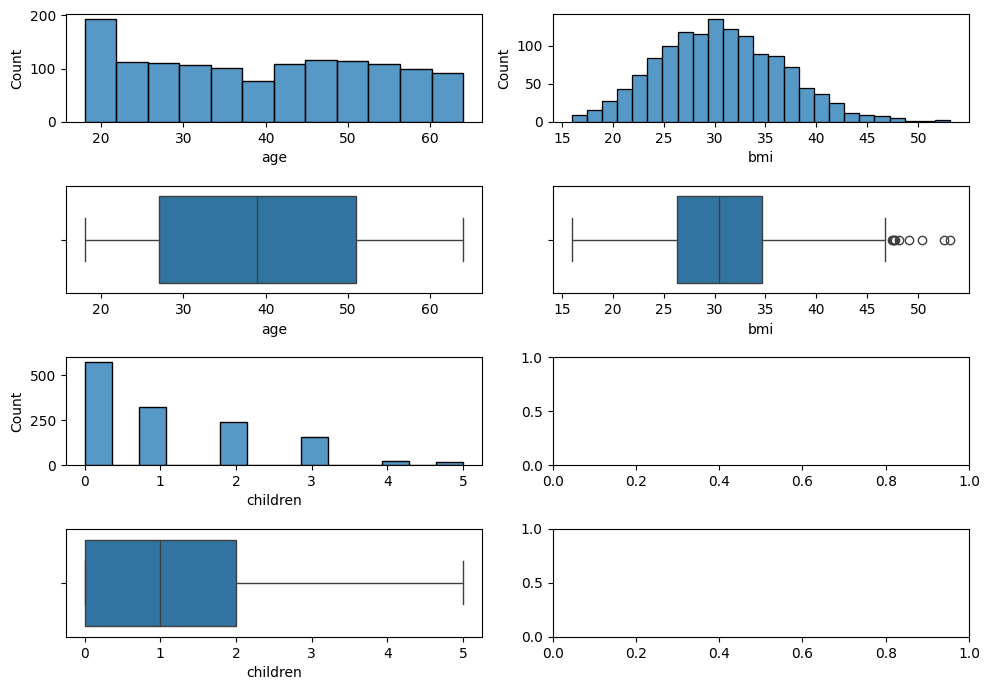

In [76]:
# Análisis sobre variables numérica

fig, axis = plt.subplots(4, 2, figsize = (10, 7))

sns.histplot(ax = axis[0, 0], data = df, x = "age")
sns.boxplot(ax = axis[1, 0], data = df, x = "age")
sns.histplot(ax = axis[0, 1], data = df, x = "bmi")
sns.boxplot(ax = axis[1, 1], data = df, x = "bmi")
sns.histplot(ax = axis[2, 0], data = df, x = "children")
sns.boxplot(ax = axis[3, 0], data = df, x = "children")

plt.tight_layout()

plt.show()

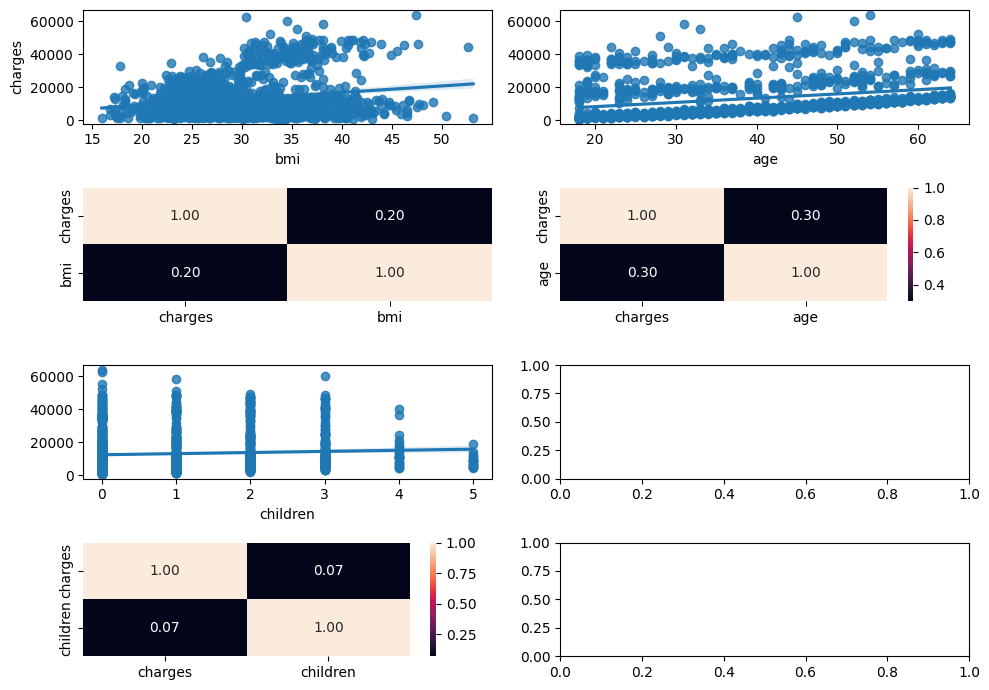

In [77]:
# Análisis numérico-numérico

fig, axis = plt.subplots(4, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = df, x = "bmi", y = "charges")
sns.heatmap(df[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df, x = "age", y = "charges").set(ylabel=None)
sns.heatmap(df[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[2, 0], data = df, x = "children", y = "charges").set(ylabel=None)
sns.heatmap(df[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

plt.tight_layout()

plt.show()

<Axes: >

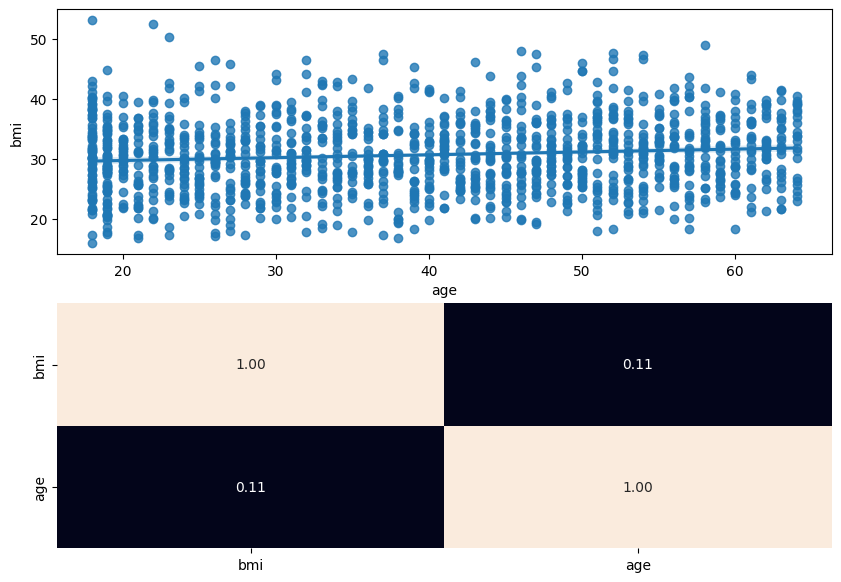

In [78]:
fig, axis = plt.subplots(2, 1, figsize = (10, 7))

sns.regplot(ax = axis[0], data = df, x = "age", y = "bmi")
sns.heatmap(df[["bmi", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

In [79]:
min = df['charges'].min()
max = df['charges'].max()
print(min)
print(max)

1121.8739
63770.42801


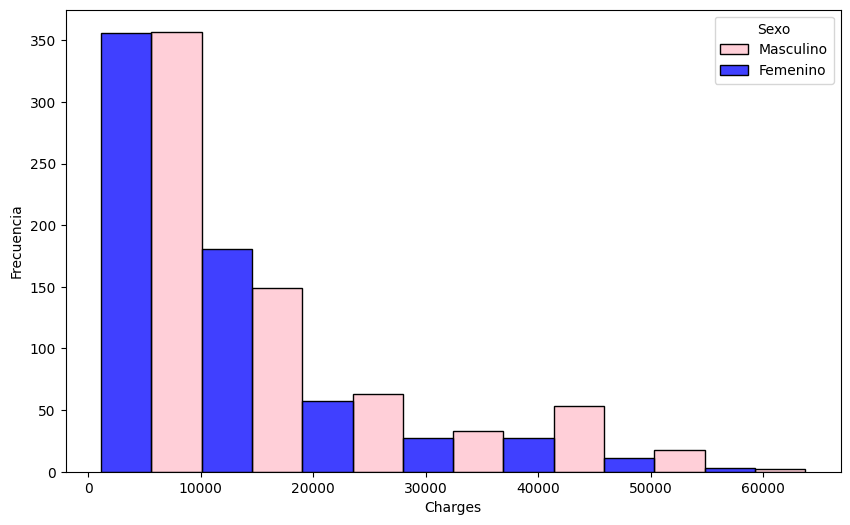

In [80]:
# Análisis categórico-categórico

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='charges', bins=7, hue='sex', multiple='dodge', palette=['blue', 'pink'])

plt.xlabel('Charges')
plt.ylabel('Frecuencia')
plt.legend(title='Sexo', labels=['Masculino', 'Femenino'])

plt.show()



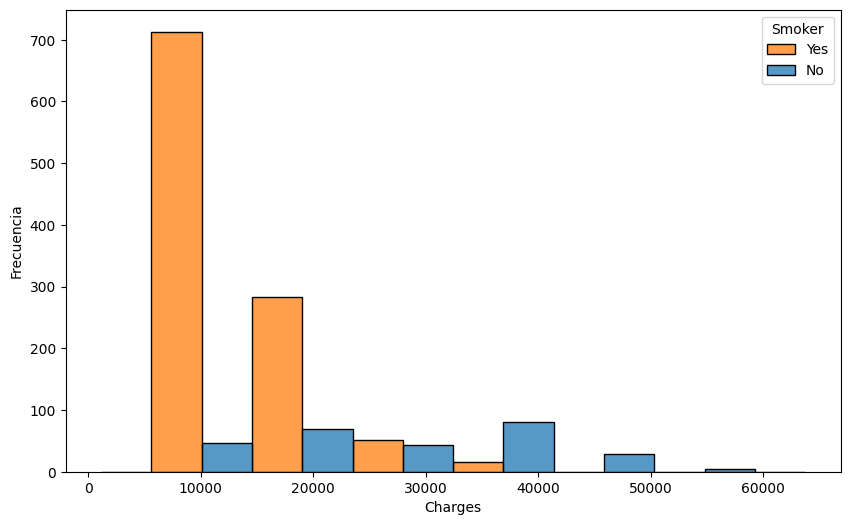

In [81]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='charges', bins=7, hue='smoker', multiple='dodge')

plt.xlabel('Charges')
plt.ylabel('Frecuencia')
plt.legend(title='Smoker', labels=['Yes', 'No'])

plt.show()

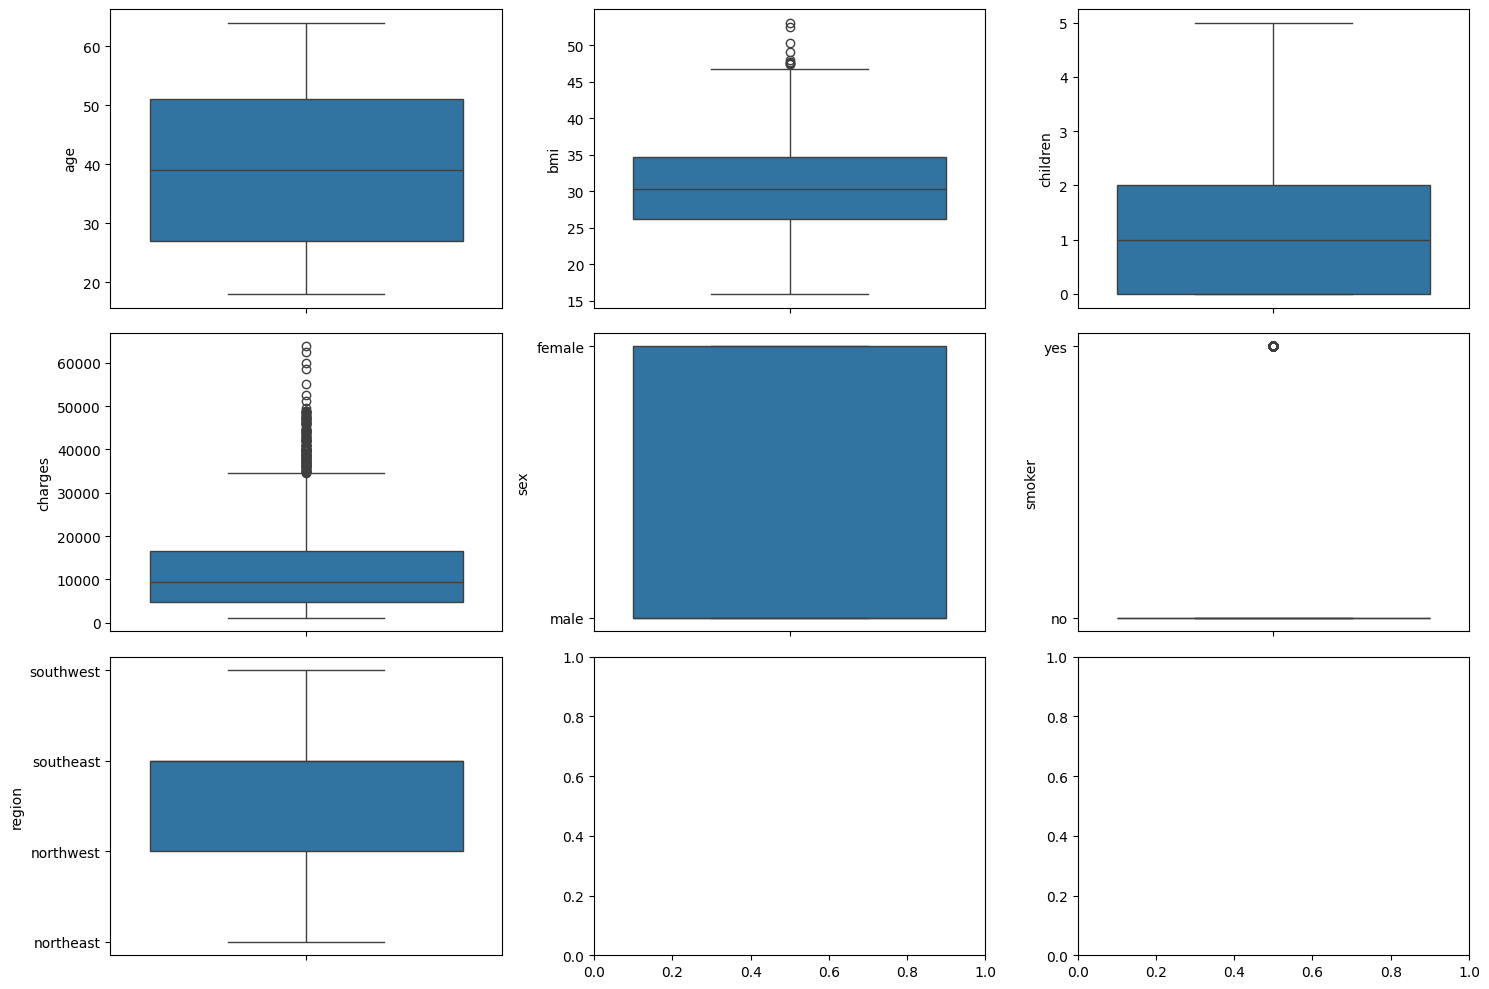

In [83]:
# Analisis de Outliers

fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = df, y = "age")
sns.boxplot(ax = axis[0, 1], data = df, y = "bmi")
sns.boxplot(ax = axis[0, 2], data = df, y = "children")
sns.boxplot(ax = axis[1, 0], data = df, y = "charges")
sns.boxplot(ax = axis[1, 1], data = df, y = "sex")
sns.boxplot(ax = axis[1, 2], data = df, y = "smoker")
sns.boxplot(ax = axis[2, 0], data = df, y = "region")

plt.tight_layout()

plt.show()

In [84]:
fare_stats = df["bmi"].describe()
fare_stats


count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [85]:
df[df["bmi"] > 46]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
438,52,female,46.75,5,no,southeast,12592.53450
454,32,male,46.53,2,no,southeast,4686.38870
543,54,female,47.41,0,yes,southeast,63770.42801
547,54,female,46.70,2,no,southwest,11538.42100
549,43,female,46.20,0,yes,southeast,45863.20500
659,37,male,46.53,3,no,southeast,6435.62370
846,23,male,50.38,1,no,southeast,2438.05520


In [90]:
df = df[df['bmi'] <= 46]
df

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1333,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1334,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1335,21,female,25.800,0,no,southwest,2007.94500,0,1,0


In [91]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df['sex_n'] = pd.factorize(df['sex'])[0]
df['smoker_n'] = pd.factorize(df['smoker'])[0]
df['region_n'] = pd.factorize(df['region'])[0]

num_variables = ['age', 'bmi', 'children', 'sex_n', 'smoker_n', 'region_n', 'charges']

scaler = MinMaxScaler()
columnas_escaladas = scaler.fit_transform(df[num_variables])
df_escalado = pd.DataFrame(columnas_escaladas, index=df.index, columns=num_variables)
df_escalado


,age,bmi,children,sex_n,smoker_n,region_n,charges
0,0.021739,0.398798,0.0,0.0,0.0,0.000000,0.256431
1,0.000000,0.594856,0.2,1.0,1.0,0.333333,0.009821
2,0.217391,0.569138,0.6,1.0,1.0,0.333333,0.054133
3,0.326087,0.225284,0.0,1.0,1.0,0.666667,0.339389
4,0.304348,0.431530,0.0,1.0,1.0,0.666667,0.044655
...,...,...,...,...,...,...,...
1332,0.695652,0.501336,0.6,1.0,1.0,0.666667,0.154198
1333,0.000000,0.533066,0.0,0.0,1.0,1.000000,0.017636
1334,0.000000,0.697729,0.0,0.0,1.0,0.333333,0.008263
1335,0.065217,0.328657,0.0,0.0,1.0,0.000000,0.014414


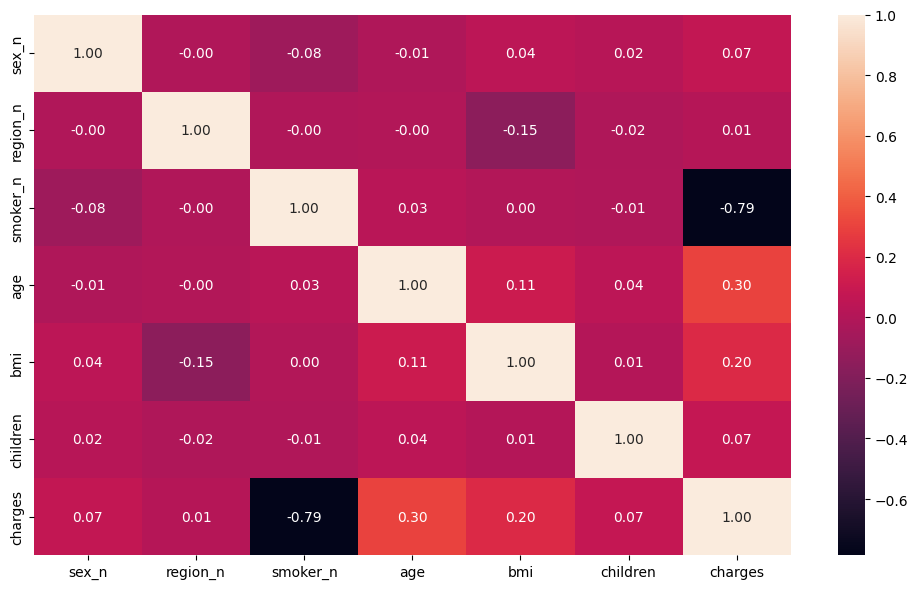

In [92]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(df_escalado[["sex_n", "region_n", "smoker_n", "age", "bmi", "children","charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

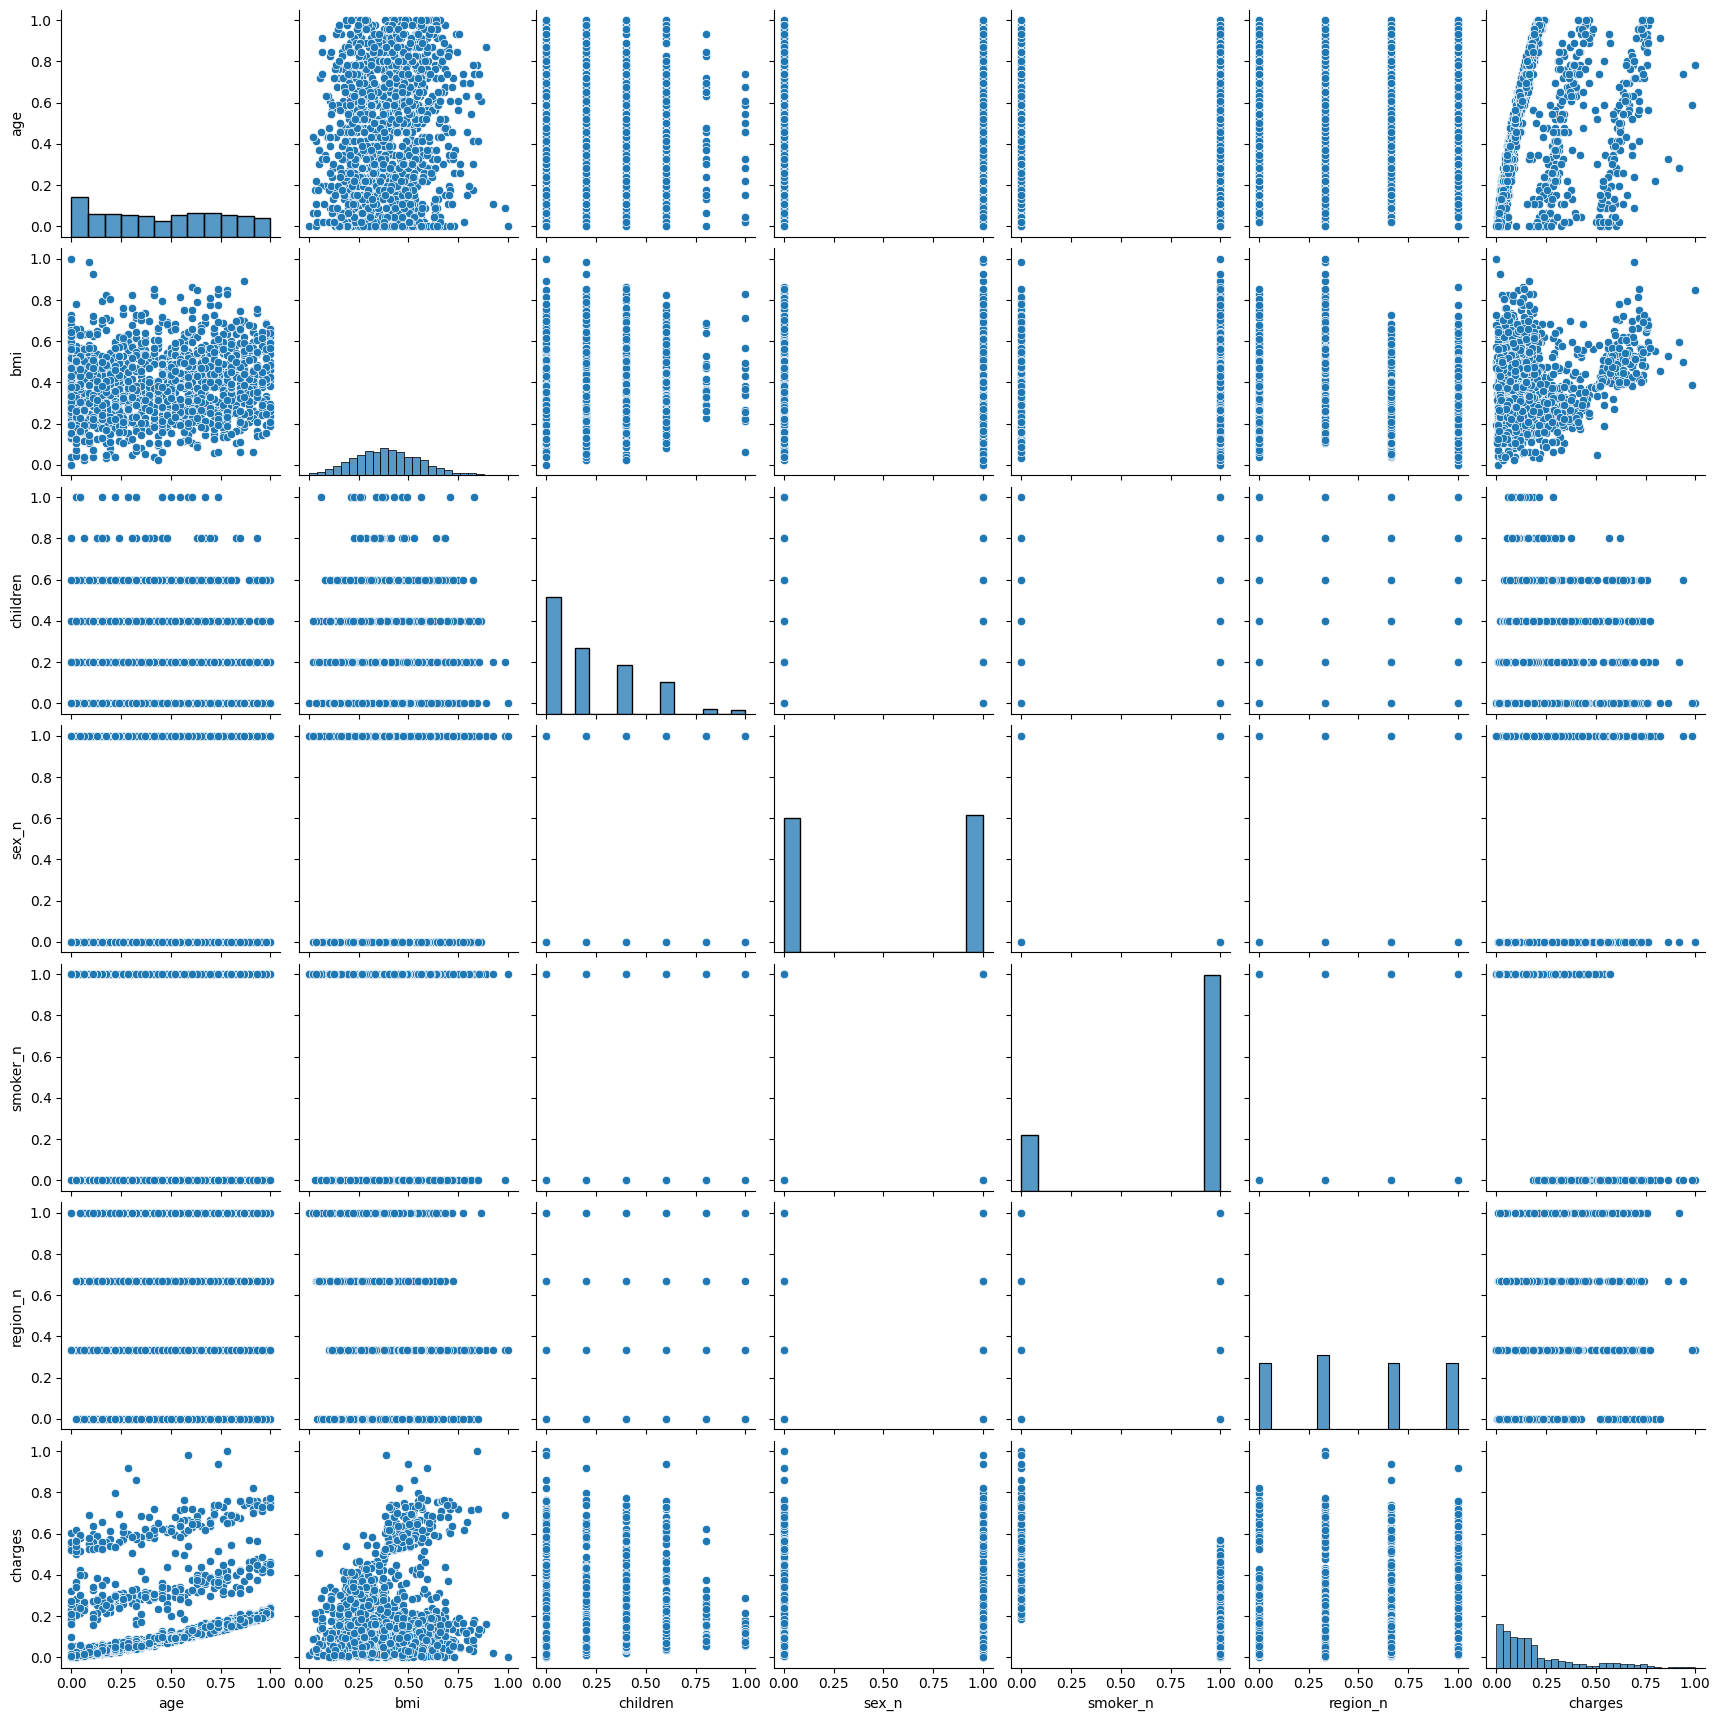

In [ ]:
sns.pairplot(data=df_escalado)

In [105]:
from sklearn.model_selection import train_test_split

X = df_escalado.drop(['charges'], axis=1)  
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [107]:
print(f'Intercepto: {model.intercept_}')
print(f'coeficientes: {model.coef_}')
df_escalado.columns

Intercepto: 19950.780970561173
coeficientes: [ 12106.00517461  10572.59418578   2499.21217481     42.43947952
 -23446.05510213   1401.01762795]


Index(['age', 'bmi', 'children', 'sex_n', 'smoker_n', 'region_n', 'charges'], dtype='object')

In [108]:
y_pred = model.predict(X_test)
y_pred

array([ 2.38543811e+03,  1.24182453e+04,  4.53374972e+03,  9.56768468e+03,
        3.24913466e+04,  2.56562896e+03,  2.92245501e+04,  3.97704870e+03,
        1.19242418e+04,  7.66950620e+03,  7.11953167e+03,  1.28001538e+04,
        5.55269496e+03,  3.80851410e+03,  1.23677948e+04,  6.90497532e+01,
        8.40754028e+03,  8.55510130e+03, -5.02969212e+02,  1.32648089e+04,
        1.66698213e+04,  2.99670984e+04,  1.44364060e+04,  4.46096884e+03,
        6.17370417e+03,  3.14157599e+04,  4.09275274e+03,  5.46768202e+03,
        1.25746685e+04,  1.24638603e+04,  4.03275618e+04,  1.22596993e+04,
        8.44526313e+03,  2.90802530e+04,  8.94983117e+03,  1.27911622e+04,
        3.15313961e+04,  1.14712284e+04, -2.58234816e+03,  3.22049755e+04,
        9.15821787e+03,  3.02401920e+04,  1.65516454e+03,  5.17959664e+03,
        1.16964543e+04,  7.93771442e+03,  9.94621733e+03,  3.41121652e+03,
        1.11589345e+04,  1.33456716e+04,  3.06274659e+04,  3.42489033e+02,
        5.39731950e+03,  

In [109]:
def R2_ajustado(r2,X_train):
    n=len(X_train)
    p= len(X_train.columns)
    return 1-((1-r2)*(n-1)/(n-p-1))

In [110]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")
print(f'R2_ajustado {R2_ajustado(r2_score(y_test,y_pred),X_train)}')

Error cuadrático medio: 31979884.902699634
Coeficiente de determinación: 0.7528995056137512
R2_ajustado 0.7514861567421425


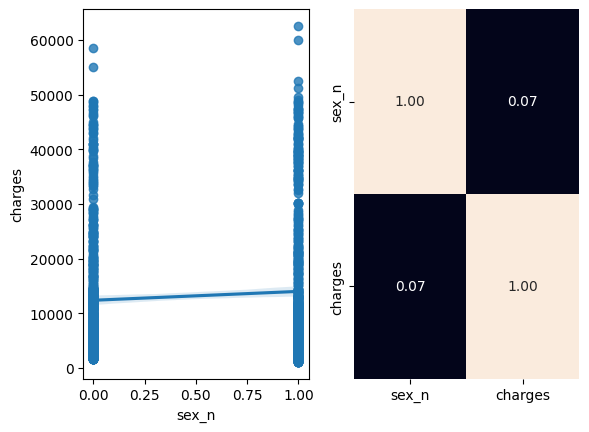

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 2)
sns.regplot(ax=axis[0], data=df, x='sex_n', y='charges')
sns.heatmap(ax=axis[1], data=df[['sex_n', 'charges']].corr(), annot=True, fmt='.2f', cbar=False)

plt.show()




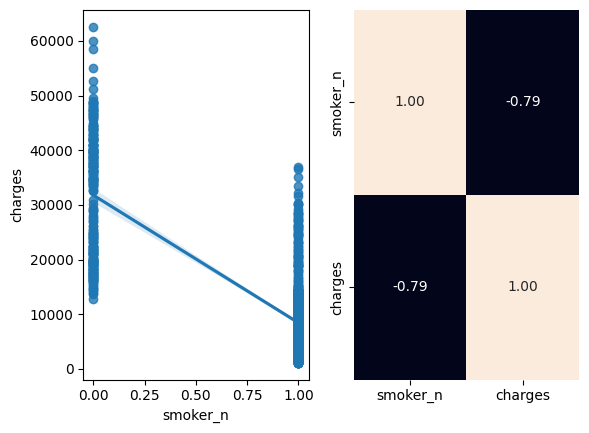

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 2)
sns.regplot(ax=axis[0], data=df, x='smoker_n', y='charges')
sns.heatmap(ax=axis[1], data=df[['smoker_n', 'charges']].corr(), annot=True, fmt='.2f', cbar=False)

plt.show()

In [113]:
y_pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'R2 : {r2_score(y_test,y_pred)}')
print(f'R2_ajustado {R2_ajustado(r2_score(y_test,y_pred),X_train)}')

MSE: 31979884.902699634
R2 : 0.7528995056137512
R2_ajustado 0.7514861567421425
